Best Polynomial Degree: 6


/Users/youcefs/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Califo

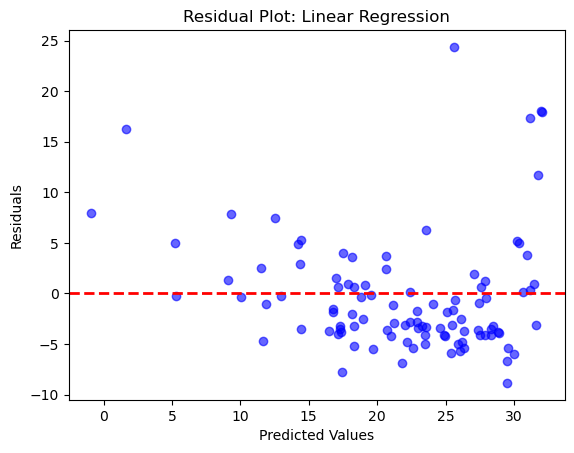

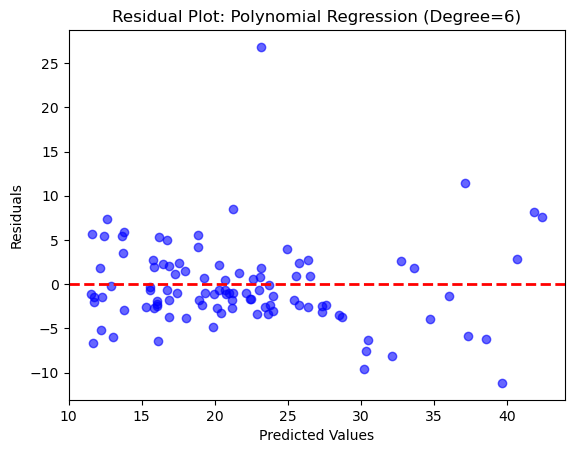

Linear Regression:
 MSE: 33.52, R^2: 0.54
Polynomial Regression (Degree=6):
 MSE: 22.78, R^2: 0.69
Testing Loaded Models...
Loaded Linear Regression:
 MSE: 33.52, R^2: 0.54
Loaded Polynomial Regression (Degree=6):
 MSE: 22.78, R^2: 0.69


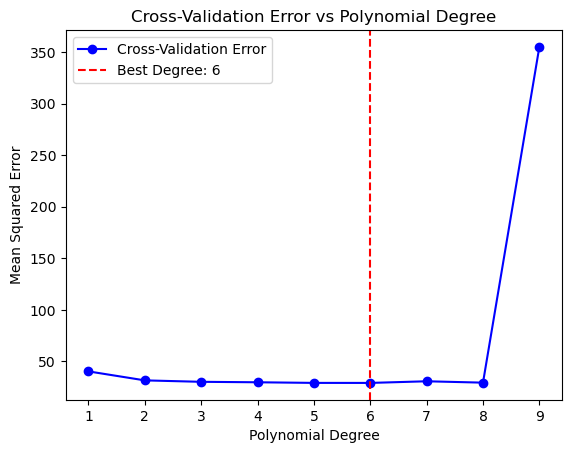

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_boston  # Use Boston dataset
from joblib import dump, load

# Load Dataset
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)  # Features
y = pd.DataFrame(boston.target, columns=["MEDV"])  # Target

# Use only one feature for simplicity
X = X[['LSTAT']]  # % lower status of the population
y = y.values  # Convert to numpy array for compatibility

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_model.predict(X_test)

# Polynomial Regression with Degree Selection
degrees = range(1, 10)
cv_errors = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X_train)
    scores = cross_val_score(LinearRegression(), X_poly, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_errors.append(-np.mean(scores))

# Determine the best degree
best_degree = degrees[np.argmin(cv_errors)]
print(f"Best Polynomial Degree: {best_degree}")

# Train Polynomial Model with Best Degree
poly_features = PolynomialFeatures(degree=best_degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predictions
y_pred_poly = poly_model.predict(X_test_poly)

# Residual Plots
def plot_residuals(y_true, y_pred, title):
    residuals = y_true - y_pred
    plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
    plt.title(title)
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.show()

# Plot Residuals
plot_residuals(y_test, y_pred_linear, "Residual Plot: Linear Regression")
plot_residuals(y_test, y_pred_poly, f"Residual Plot: Polynomial Regression (Degree={best_degree})")

# Evaluate Models
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name}:\n MSE: {mse:.2f}, R^2: {r2:.2f}")

evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_poly, f"Polynomial Regression (Degree={best_degree})")

# Save Models
dump(linear_model, 'linear_model.joblib')
dump(poly_model, 'poly_model.joblib')
dump(poly_features, 'poly_features.joblib')  # Save the polynomial transformer

# Load Models
loaded_linear_model = load('linear_model.joblib')
loaded_poly_model = load('poly_model.joblib')
loaded_poly_features = load('poly_features.joblib')

# Test Loaded Models
print("Testing Loaded Models...")
y_pred_loaded_linear = loaded_linear_model.predict(X_test)
y_pred_loaded_poly = loaded_poly_model.predict(loaded_poly_features.transform(X_test))

evaluate_model(y_test, y_pred_loaded_linear, "Loaded Linear Regression")
evaluate_model(y_test, y_pred_loaded_poly, f"Loaded Polynomial Regression (Degree={best_degree})")

# Plot Cross-Validation Error for Degree Selection
plt.plot(degrees, cv_errors, marker='o', color='blue', label='Cross-Validation Error')
plt.axvline(x=best_degree, color='red', linestyle='--', label=f"Best Degree: {best_degree}")
plt.title("Cross-Validation Error vs Polynomial Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()